# 3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Load dataset

In [5]:
trainingset = np.loadtxt('./training.csv', delimiter=',')
testingset = np.loadtxt('./test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [6]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [7]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


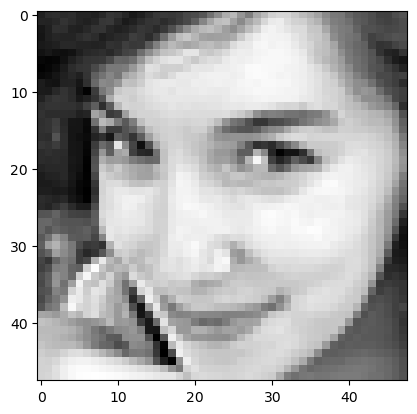

facial emotion: happy


In [8]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [9]:
happy_sad_training = trainingset[(trainingset[:,n_inputs + 3] == 1) | (trainingset[:,n_inputs + 4] == 1)]
happy_sad_testing = testingset[(testingset[:,n_inputs + 3] == 1) | (testingset[:,n_inputs + 4] == 1)]

x_happy_sad_training = happy_sad_training[:, 0:n_inputs]
y_happy_sad_training = happy_sad_training[:, n_inputs:n_inputs + n_classes]

x_happy_sad_testing = happy_sad_testing[:, 0:n_inputs]
y_happy_sad_testing = happy_sad_testing[:, n_inputs:n_inputs + n_classes]


In [12]:
print("Length of Happy Sad Traning:", len(happy_sad_training))
print("Length of Happy Sad Testing:", len(happy_sad_testing))

Length of Happy Sad Traning: 12045
Length of Happy Sad Testing: 1548


[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

In [13]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Applying PCA
variance=0.9
pca = PCA(variance)
x_pca_training = pca.fit_transform(x_happy_sad_training)
# Inverse transform to visualize
sample_faces_pca = pca.inverse_transform(x_pca_training[:5]).reshape(-1, 48, 48)



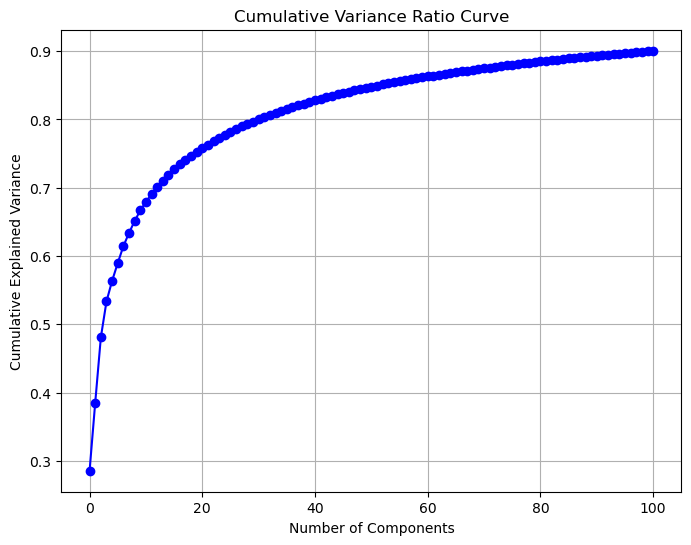

In [14]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance ratio curve
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Ratio Curve')
plt.grid(True)
plt.show()

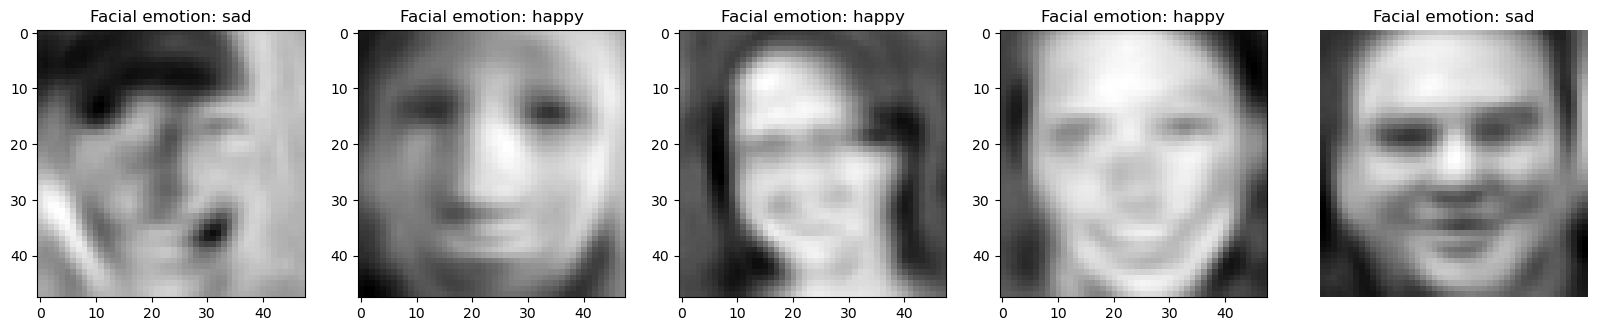

In [15]:
plt.figure(figsize=(20, 5))
# Displaying PCA faces
for i, face in enumerate(sample_faces_pca):
    plt.subplot(1, 5, i + 1)
    
    plt.imshow(face, cmap='gray')
    emotion = get_emotion(y_happy_sad_testing[i])  # Change to use lda_predictions if needed
    plt.title(f'Facial emotion: {emotion}')

plt.axis("off")
plt.show()

In [13]:
# Applying LDA
lda = LDA(n_components=1)
x_lda_training = lda.fit_transform(x_happy_sad_training, np.argmax(y_happy_sad_training, axis=1))
x_lda_testing = lda.transform(x_happy_sad_testing)


[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(x_happy_sad_training, np.argmax(y_happy_sad_training, axis=1))

nb_predictions = nb_model.predict(x_happy_sad_testing)
accuracy = accuracy_score(np.argmax(y_happy_sad_testing, axis=1), nb_predictions)
print("Naive Bayes Accuracy: ", accuracy*100)


Naive Bayes Accuracy:  59.04392764857881


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [15]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_happy_sad_training, np.argmax(y_happy_sad_training, axis=1))

lr_predictions = lr_model.predict(x_happy_sad_testing)
accuracy = accuracy_score(np.argmax(y_happy_sad_testing, axis=1), lr_predictions)
print("Logistic Regression Accuracy: ", accuracy*100)


Logistic Regression Accuracy:  64.85788113695091


/Users/j/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_happy_sad_training, np.argmax(y_happy_sad_training, axis=1))

svm_predictions = svm_model.predict(x_happy_sad_testing)
accuracy = accuracy_score(np.argmax(y_happy_sad_testing, axis=1), svm_predictions)
print("SVM Accuracy: ", accuracy*100)


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

Determining the intensity or degree of emotions like happiness or sadness is better approached with models designed for regression tasks or specialized emotion detection algorithms, rather than standard classification models. These alternatives can yield continuous outputs that quantify the intensity of an emotion, offering a more nuanced understanding than categorical labels.

In this context, Logistic Regression can be a favorable option. Although it is fundamentally a classification model, it estimates probabilities that can be interpreted continuously, owing to its regression underpinnings. This can provide insights into the degree of an emotion experienced, aligning with the objective of measuring emotional intensities.

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [ ]:
probabilities = svm_model.decision_function(x_happy_sad_testing)
sorted_indices = np.argsort(probabilities)
sad_faces = x_happy_sad_testing[sorted_indices[-5:]].reshape(-1, 48, 48)
happy_faces = x_happy_sad_testing[sorted_indices[:5]].reshape(-1, 48, 48)

In [ ]:
print("Happy Emotions")
for i, face in enumerate(happy_faces):
    plt.subplot(2, 5, i + 6)
    plt.imshow(face, cmap='gray')
    plt.axis("off")
plt.show()

In [ ]:
print("Sad Emotions:")
for i, face in enumerate(sad_faces):
    plt.subplot(2, 5, i + 6)
    plt.imshow(face, cmap='gray')
    plt.axis("off")

plt.show()

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [20]:
# Flattening the images to make them 2D
x_training_flat = x_training.reshape(x_training.shape[0], -1)
x_testing_flat = x_testing.reshape(x_testing.shape[0], -1)

# Applying PCA
desired_variance=0.9
pca = PCA(desired_variance)
x_pca_training = pca.fit_transform(x_training_flat)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Applying PCA for only happy and sad faces
x_happy_sad_training_flat = x_happy_sad_training.reshape(x_happy_sad_training.shape[0], -1)
pca_hs = PCA(n_components=100) #As we got 100 number of components from happy and sad emotions which define 90% variance
x_pca_hs = pca_hs.fit_transform(x_happy_sad_training_flat)
cumulative_variance_hs = np.cumsum(pca_hs.explained_variance_ratio_)

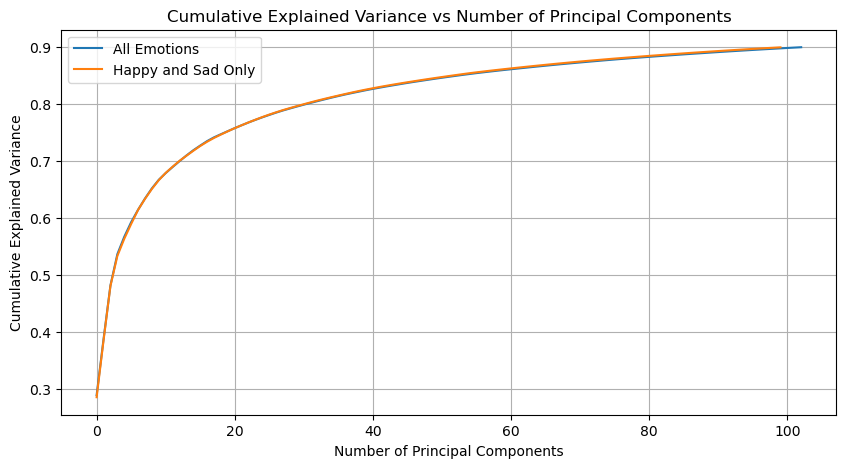

In [21]:
plt.figure(figsize=(10,5))
plt.plot(cumulative_variance, label='All Emotions')
plt.plot(cumulative_variance_hs, label='Happy and Sad Only')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Flattening the images to make them 2D
x_training_flat = x_training.reshape(x_training.shape[0], -1)

# Applying LDA for multi-class
lda = LDA()
x_lda_multi = lda.fit_transform(x_training_flat, np.argmax(y_training, axis=1))

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [ ]:
x_training_flat = x_training.reshape(x_training.shape[0], -1)
x_testing_flat = x_testing.reshape(x_testing.shape[0], -1)


nb_model_multi = GaussianNB()
nb_model_multi.fit(x_training_flat, np.argmax(y_training, axis=1))
nb_predictions_multi = nb_model_multi.predict(x_testing_flat)

accuracy = accuracy_score(np.argmax(y_testing, axis=1), nb_predictions_multi)
print("Naive Bayes Accuracy: ", accuracy)


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [ ]:
class_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"] 

cm = confusion_matrix(np.argmax(y_testing, axis=1), nb_predictions_multi)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In the context of facial emotion recognition, each emotion or class is considered individually against the input features to estimate the probability that the given face belongs to that class. These probabilities are then compared, and the emotion corresponding to the highest probability is predicted as the output. This process is inherently suited for multi-class classification and does not require the transformation of the problem into binary classifications. Each class's probabilities are evaluated in a single pass, making Naive Bayes efficient and straightforward for such tasks.

The model demonstrated a commendable performance in accurately classifying emotions categorized as "Sad" and "Surprise." This proficiency is indicative of the model's ability to adeptly identify and learn the distinct features characterizing these specific emotions. In contrast, a notable challenge was encountered in the accurate classification of the "Angry" and "Disgust" emotions. The model manifested a diminished performance in these categories, underscoring a potential area for enhancement.

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [ ]:

# Creating and training the logistic regression model
lr_model_multi = LogisticRegression(max_iter=1000)
lr_model_multi.fit(x_training_flat, np.argmax(y_training, axis=1))

# Predicting and calculating accuracy
lr_predictions_multi = lr_model_multi.predict(x_testing_flat)
accuracy = accuracy_score(np.argmax(y_testing, axis=1), lr_predictions_multi)
print("Logistic Regression Accuracy: ", accuracy)



Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [ ]:
# Creating and visualizing the confusion matrix
cm = confusion_matrix(np.argmax(y_testing, axis=1), lr_predictions_multi)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


The model appears to be particularly adept at identifying "Happy" facial expressions, which could be attributed to distinct and recognizable features associated with happiness, such as smiles and the positioning of facial muscles. In contrast, other emotions, such as "Sad," "Angry," or "Surprised," were not as effectively classified. This discrepancy in classification performance can result from various factors, including the complexity of facial features associated with different emotions and the quality and diversity of the training data

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [ ]:
# Creating and training the SVM model
svm_model_multi = SVC()
svm_model_multi.fit(x_training_flat, np.argmax(y_training, axis=1))

# Predicting and calculating accuracy
svm_predictions_multi = svm_model_multi.predict(x_testing_flat)
accuracy = accuracy_score(np.argmax(y_testing, axis=1), svm_predictions_multi)
print("SVM Accuracy: ", accuracy)



Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [ ]:
# Confusion Matrix
cm = confusion_matrix(np.argmax(y_testing, axis=1), svm_predictions_multi)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


The SVM model has achieved an accuracy of approximately 44.66%, which indicates a moderate level of effectiveness in classifying facial expressions into respective emotion categories. The higher count of true positives for "Happy" indicates that the model is particularly attuned to features and patterns associated with this emotion. This could potentially be attributed to a well-represented training dataset for "Happy" emotions or distinctive features that make this class easier to identify. However, for other emotions, the model has demonstrated a more modest performance. This could be due to overlapping features between different emotions, or insufficient or unrepresentative training data for those specific classes.

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

Based on the confusion matrix, it is clearly observed that emotions like "Fear" and "Surpirse" are most similar whereas emotions like "Happy" and "Angry" are least similar

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [ ]:
probabilities = svm_model_multi.decision_function(x_testing_flat)

# Get predicted labels
predicted_labels = np.argmax(probabilities, axis=1)
true_labels = np.argmax(y_testing, axis=1)

# Define a threshold
threshold = 0.5  # Adjust this value based on your specific case

# Get indices of potentially mislabeled samples
mislabeled_indices = np.where((predicted_labels != true_labels) & 
                              (np.max(probabilities, axis=1) > threshold))[0]






In [ ]:
# Display potentially mislabeled images
plt.figure(figsize=(10, 5))  # Adjust the figure size
for i, index in enumerate(mislabeled_indices[:10]):  # Show up to 10 samples
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_testing_flat[index].reshape(48, 48), cmap='gray')  # Ensure images are reshaped back to 48x48
    predicted_class = class_names[predicted_labels[index]]
    true_class = class_names[true_labels[index]]
    plt.title(f'Pred: {predicted_class}, True: {true_class}', fontsize=7)
    plt.axis('off')  
plt.show()


# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox  # Added this import statement
from sklearn.manifold import TSNE

# Use decision function values as features
features = svm_model_multi.decision_function(x_testing_flat)

# Apply t-SNE
tsne = TSNE(n_components=2)
embedded_features = tsne.fit_transform(features)

# Plot the embedded features, with images on them
fig, ax = plt.subplots(figsize=(10, 8))

# Just a small function to plot images on the points
def plot_image_on_point(x, y, image, ax):
    im = OffsetImage(image, zoom=0.5, cmap='gray')
    ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
    ax.add_artist(ab)

for (x, y), image in zip(embedded_features, x_testing_flat):  # Changed x_testing to x_testing_flat and reshaped below
    plot_image_on_point(x, y, image.reshape(48, 48), ax)  # Added reshape to convert the flattened image back to 2D

ax.update_datalim(embedded_features)
ax.autoscale()
plt.show()

